In [1]:
import turicreate

# Read some product review data

In [2]:
products = turicreate.SFrame('amazon_baby.sframe')

# Explore the data

In [3]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


# Build the word count vector for each review

In [4]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [5]:
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [6]:
products['name'].show()

Materializing SArray

In [11]:
# Also:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


# Explore vulli sophie

In [41]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [8]:
len(giraffe_reviews) #length

785

In [10]:
giraffe_reviews['rating'].show()

Materializing SArray

# Build sentiment classifer

In [12]:
products['rating'].show()

Materializing SArray

## Define what's a positive and a negative sentiment

In [14]:
#ignore all 3-star reviews
products = products[products['rating'] != 3]
#subset: out of the products table, only keep the rows where 
#products$rating column is not 3

In [15]:
#positive sentiment = 4 or 5 starts
products['sentiment'] = products['rating'] >= 4

In [16]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1


## Train sentiment classifer

In [18]:
train_data, test_data = products.random_split(.8, seed=0)

In [19]:
sentiment_model = turicreate.logistic_classifier.create(train_data,
                                                       target='sentiment',
                                                       features=['word_count'],
                                                       validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 4.332817     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 7.095543     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 8.507043     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 9.366827     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 10.641034    | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 14.616223    | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Evaluate the sentiment model

In [20]:
sentiment_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   0.001   | 0.698948948948949  | 0.9933514440949385 | 27976 | 5328 |
 |   0.002   | 0.6619744744744744 | 0.9922076065198742 | 27976 | 5328 |
 |   0.003   | 0.6385135135135135 | 0.9909922790963683 | 27976 | 5328 |
 |   0.004   |  0.62256006006006  | 0.9903846153846154 | 27976 | 5328 |
 |   0.005   | 0.6112987987987988 | 0.989848441521304  | 27976 | 5328 |
 |   0.006   | 0.6002252252252253 | 0.9894195024306548 | 27976 | 5328 |
 |   0.007   | 0.589527027027027  | 0.9888475836431226 | 27976 | 5328 |
 |   0.008   | 0.5816441441441441 | 0.9883828996282528 | 27976 | 5328 |
 |   0.009   | 0.574512012012012

In [30]:
ev = sentiment_model.evaluate(test_data, metric='roc_curve')

In [31]:
turicreate.show(ev['roc_curve']['fpr'], 
                ev['roc_curve']['tpr'])

Materializing X axis SArray

Materializing Y axis SArray

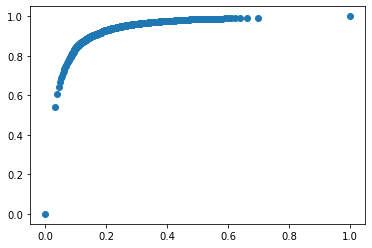

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(ev['roc_curve']['fpr'], ev['roc_curve']['tpr'])

# Apply the learned model to understand sentiment for giraffe

In [44]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews,
                                                                output_type='probability')

In [35]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",0.9993655365682315
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",0.9998633791689631
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0.2545268197805312
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",0.9165688083914811
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",0.6855768205884094
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",0.99999994452112
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",0.997935118109351
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",0.9999745004834385
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",0.9460144428356527
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ...",0.38301136142106595


## Sort the reviews based on the predicted sentiment and explore

In [45]:
giraffe_reviews1 = giraffe_reviews.sort('predicted_sentiment',
                                      ascending=False)

In [46]:
giraffe_reviews1.head()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'use': 1.0, 'get': 1.0,'will': 1.0, 'where': ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'explore': 1.0,'adventures': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'09': 1.0, '11': 1.0,'recommended': 1.0, ' ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'parents': 1.0,'recommend': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'future': 1.0, 'use':1.0, 'am': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'worth':1.0, 'definitely': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'teether': 1.0, 'want':1.0, 'price': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'must': 1.0, 'nuts':1.0, 'we': 1.0, 'thei ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'well': 1.0, 'natural':1.0, 'makers': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",1


In [47]:
giraffe_reviews1[0]['review']

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

## Show most negative reviews

In [48]:
giraffe_reviews1[-1]['review'] #-1 is top worst; -2 is second worst

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [49]:
giraffe_reviews1[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

# Assignment 3
## 1. Use .apply() to build a new feature with the counts for each of the selected_words:
In the notebook above, we created a column ‘word_count’ with the word counts for each review. Our first task is to create a new column in the products SFrame with the counts for each selected_word above, and, in the process, we will see how the method .apply() can be used to create new columns in our data (our features) and how to use a Python function, which is an extremely useful concept to grasp!

In [50]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 
                  'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [65]:
# Redundant method:
# def awesome_count(word_count):
#    if 'awesome' in word_count:
#        return word_count['awesome']
#    return 0

# products['awesome'] = products['word_count'].apply(awesome_count)

# Create function involving apply to use the selected words as key to extract the word count
# from the dictionary column word_count
def selected_words_count(word_count, word):
     if word in word_count:
         return word_count[word]
     return 0

    # apply the function through each row (x) to create columns to store the word count for each word in selected_words
for word in selected_words:
     products[word] = products.apply(lambda x: selected_words_count(x['word_count'], word))

### To expand this shortcut:

# def awesome_count(word_count):
#     if 'awesome' in word_count:
#         return word_count['awesome']
#     return 0

# products['awesome'] = products['word_count'].apply(awesome_count)

# def great_count(word_count):
#     if 'great' in word_count:
#         return word_count['great']
#     return 0

# products['great'] = products['word_count'].apply(great_count)

# def fantastic_count(word_count):
#     if 'fantastic' in word_count:
#         return word_count['fantastic']
#     return 0

# products['fantastic'] = products['word_count'].apply(fantastic_count)

# def amazing_count(word_count):
#     if 'amazing' in word_count:
#         return word_count['amazing']
#     return 0

# products['amazing'] = products['word_count'].apply(amazing_count)

# def love_count(word_count):
#     if 'love' in word_count:
#         return word_count['love']
#     return 0

# products['love'] = products['word_count'].apply(love_count)

# def horrible_count(word_count):
#     if 'horrible' in word_count:
#         return word_count['horrible']
#     return 0

# products['horrible'] = products['word_count'].apply(horrible_count)

# def bad_count(word_count):
#     if 'bad' in word_count:
#         return word_count['bad']
#     return 0

# products['bad'] = products['word_count'].apply(bad_count)

# def terrible_count(word_count):
#     if 'terrible' in word_count:
#         return word_count['terrible']
#     return 0

# products['terrible'] = products['word_count'].apply(terrible_count)

# def awful_count(word_count):
#     if 'awful' in word_count:
#         return word_count['awful']
#     return 0

# products['awful'] = products['word_count'].apply(awful_count)

# def wow_count(word_count):
#     if 'wow' in word_count:
#         return word_count['wow']
#     return 0

# products['wow'] = products['word_count'].apply(wow_count)

# def hate_count(word_count):
#     if 'hate' in word_count:
#         return word_count['hate']
#     return 0

# products['hate'] = products['word_count'].apply(hate_count)

In [66]:
products.head()

name,review,rating,word_count,sentiment,awesome
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1,0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",1,0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1,0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1,0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1,0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0,'recommend': 1.0, ...",1,0


In [74]:
# Using the .sum() method on each of the new columns you created, answer the following questions:  
# Out of the selected_words, which one is most used in the dataset?  Which one is least used?
print(products['awesome'].sum())
print(products['great'].sum())

3892
55791.0


In [77]:
# Shortcut
print('Word count value:')

for word in selected_words:
    print('{0}: {1}'.format(word, products[word].sum()))

## Most used: great
## Least used: wow

Word count value:
awesome: 3892
great: 55791.0
fantastic: 1664.0
amazing: 2628
love: 41994.0
horrible: 1110
bad: 4183
terrible: 1146
awful: 687
wow: 425
hate: 1107


## 2. Create a new sentiment analysis model using only the selected_words as features

In [79]:
# split again cuz now we have new columns
train_data,test_data = products.random_split(.8, seed=0)

In [80]:
selected_words_model = turicreate.logistic_classifier.create(train_data,
                                                       target='sentiment',
                                                       features=selected_words,
                                                       validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.374340     | 0.847401          | 0.845874            |

| 2         | 3        | 0.564229     | 0.847514          | 0.846085            |

| 3         | 4        | 0.747118     | 0.847626          | 0.846115            |

| 4         | 5        | 0.922737     | 0.847708          | 0.846385            |

| 5         | 6        | 1.101942     | 0.847708          | 0.846385            |

| 6         | 7        | 1.297205     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [92]:
selected_words_model.coefficients.sort('value', ascending=False).print_rows(num_rows=15)

# Most positive weight: love
# Most negative weight: horrible

selected_words_model.coefficients.sort('value', ascending=True)

+-------------+-------+-------+----------------------+----------------------+
|     name    | index | class |        value         |        stderr        |
+-------------+-------+-------+----------------------+----------------------+
|     love    |  None |   1   |  1.359268866922504   | 0.02806830015209953  |
| (intercept) |  None |   1   |  1.3365913848877726  | 0.008929969787655916 |
|   awesome   |  None |   1   |  1.133534666034134   | 0.08399643983187562  |
|   amazing   |  None |   1   |  1.100093311366018   |  0.0995477626046598  |
|  fantastic  |  None |   1   |   0.88580475688142   | 0.11167591293399651  |
|    great    |  None |   1   |  0.8630655001196439  | 0.018955052444376685 |
|     wow     |  None |   1   | -0.00953823606768843 | 0.16046411224711649  |
|     bad     |  None |   1   | -0.9914778800650664  | 0.03848428664699063  |
|     hate    |  None |   1   | -1.3484407222463202  | 0.07715698604297323  |
|    awful    |  None |   1   | -2.0529082040313598  | 0.1009973

name,index,class,value,stderr
horrible,None,1,-2.251335236759102,0.08020249388788425
terrible,None,1,-2.2236614360851346,0.07731736203785744
awful,None,1,-2.0529082040313598,0.10099735435259247
hate,None,1,-1.3484407222463202,0.07715698604297323
bad,None,1,-0.9914778800650664,0.03848428664699063
wow,None,1,-0.00953823606768843,0.16046411224711649
great,None,1,0.8630655001196439,0.018955052444376685
fantastic,None,1,0.88580475688142,0.11167591293399651
amazing,None,1,1.100093311366018,0.0995477626046598
awesome,None,1,1.133534666034134,0.08399643983187562


## 3. Comparing the accuracy of different sentiment analysis model

In [93]:
selected_words_model.evaluate(test_data)
# Accuracy: 0.84638

{'accuracy': 0.8463848186404036,
 'auc': 0.6935096220934976,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 |      1       |        0        |  159  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.39622654670876317,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328

In [94]:
sentiment_model.evaluate(test_data)
# Accuracy: 0.91770

{'accuracy': 0.9176975738650012,
 'auc': 0.9258242975424673,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 |      1       |        0        |  1344 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.33047871872322016,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0 

In [95]:
# Build majority class classifier model?
great_model = turicreate.logistic_classifier.create(train_data,
                                                       target='sentiment',
                                                       features=['great'],
                                                       validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.501696     | 0.841399          | 0.840019            |

| 2         | 3        | 0.715513     | 0.841399          | 0.840019            |

| 3         | 4        | 0.894127     | 0.841399          | 0.840019            |

| 4         | 5        | 1.038919     | 0.841399          | 0.840019            |

| 5         | 6        | 1.173453     | 0.841399          | 0.840019            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [96]:
great_model.evaluate(test_data)
# Accuracy: 0.84002

{'accuracy': 0.8400192169108815,
 'auc': 0.5892380821806936,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  5328 |
 |      1       |        1        | 27976 |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 0.9130548302872062,
 'log_loss': 0.4276180775555879,
 'precision': 0.8400192169108815,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 27976 | 5328 |
 |   0.001   | 1.0 | 1.0 | 27976 | 5328 |
 |   0.002   | 1.0 | 1.0 | 27976 | 5328 |
 |   0.003   | 1.0 | 1.0 | 27976 | 5328 |
 |   0.004   | 1.0 | 1.0 | 27976 | 

The model learned using all words performed better than the other two. The other two approaches performed about the same.

## 4. Interpreting the difference in performance between the models

In [97]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [98]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews,
                                                                output_type='probability')

In [109]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment',
                                      ascending=False)
diaper_champ_reviews.head()
# predicted_sentiment for the most positive review: 0.9999999999895941

# or use this:
diaper_champ_reviews['predicted_sentiment'].max()

0.9999999999895941

In [120]:
#If we use selected_words_model to analyze sentiment, the predicted_sentiment for the most
#positive review found from above is: 0.79193
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.7919288370624482]

In [122]:
diaper_champ_reviews[0]['review']
diaper_champ_reviews[0]

{'name': 'Baby Trend Diaper Champ',
 'review': "I read a review below that can explain exactly what we experienced. We've had it for 16 months and it has worked wonderful for us. No smells, change it out once a week, easy to clean. Then a diaper snagged this foam material in the head part, so I pulled the rest of the foam out. Big mistake!!! Now it can no loner retain the stinkiness and we're looking for a replacement. Be careful of overloading and never take out that foam piece that is cushioned between pieces. I have figured out that it is key to keeping the stink out.",
 'rating': 4.0,
 'word_count': {'key': 1.0,
  'have': 1.0,
  'pieces': 1.0,
  'between': 1.0,
  'cushioned': 1.0,
  'piece': 1.0,
  'take': 1.0,
  'overloading': 1.0,
  'be': 1.0,
  'looking': 1.0,
  're': 1.0,
  'stinkiness': 1.0,
  'retain': 1.0,
  'now': 1.0,
  'stink': 1.0,
  'once': 1.0,
  'of': 2.0,
  'below': 1.0,
  'rest': 1.0,
  'so': 1.0,
  'head': 1.0,
  'never': 1.0,
  'foam': 3.0,
  'careful': 1.0,
  'th

Why is the value of the predicted_sentiment for the most positive review found using the sentiment_model much more positive than the valude predicted using the selected_words_model?

Because none of the selected words appeared in the text of this review, revealed by all the zeros in the selected words columns.